In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

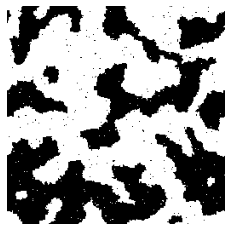

In [5]:
# Loading image
img = np.array(Image.open('cold.png')).astype('int64')
img[img == 0] = -1
img[img == 255] = 1
# print(set(img.reshape(-1)))
fig = plt.figure()
plt.imshow(img, cmap='gray', vmin=-1, vmax=1)
plt.axis('off')
plt.show()

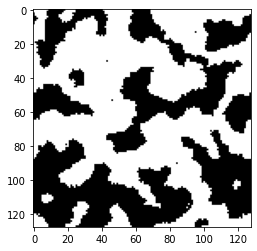

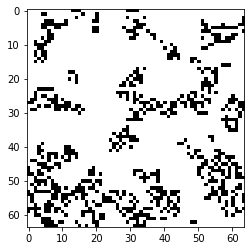

In [6]:
for idx in range(2):
  new_img = np.zeros((int(img.shape[0]/2),int(img.shape[0]/2)))
  for jdx in range(int(img.shape[0]/2)):
    for kdx in range(int(img.shape[0]/2)):
      # Majority rule
      val = np.sum(img[2*jdx:2*jdx+2, 2*kdx:2*kdx+2])
      if val < 0:
        val = -1
      elif val > 0:
        val = 1
      else:
        val = np.random.choice(a=[1,-1])
      new_img[jdx,kdx] = val
  img = new_img.copy()
  # Saving image
  img[img == -1] = 0
  img[img == 1] = 255
  Image.fromarray(img.astype('uint8')).convert('L').save("cg{}.png".format(idx+1))
  fig = plt.figure()
  plt.imshow(img, cmap='gray')
  plt.show()